<a href="https://colab.research.google.com/github/laprass/drive/blob/main/Section4_Project_%EB%B0%95%ED%83%9C%EC%A4%80_glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  1. 관심 데이터 선정

- 뉴스데이터로 주가변동을 예측 할 수 있을까? (with kaggle)
- RNN, LSTM, GRU 같은 자연어 처리 모델로 키워드를 분석하여 익일의 주가를 예측해보자


- 분석대상 : 8년 간의 야후 파이낸스 뉴스데이터 (2008-08-08 ~ 2016-07-01)
- 예측대상 : 동일한 기간의 다우존스지수 
- 분석모델 : LogisticRegression, LSTM

- Kaggle URL = https://www.kaggle.com/aaron7sun/stocknews

## 2.  데이터 선정 이유 

- 현재 국내 자산운용사는 대부분 퀀트투자 모델을 기반으로 하고 있다.
- 하지만 미국 월가 시장처럼 비정형데이터를 기반으로 트레이딩봇 기술을 국내에서도 요구할 것임이 분명하다 판단하였다.
- 대표적인 뉴스데이터를 활용한 자연어처리 기술을 이용하여 키워드를 파악하여 향후 주가를 예측해보는 연구를 진행해보겠다.

## 3. 데이터를 이용한 가설

- 가설1 : 주가에 큰 변동성을 가져다줄만한 사건이 일어나고 언론사들은 이것을 보도할 것 이다.
- 가설2 : 언론이 보도한 신문기사의 특정 키워드들은 그날 주가가 어떻게 변동할지 예측할 수 있는 단서가 될 것 이다.

#### 요약 : 즉, 언론기사의 특정 키워드들이 주가변동과 높은 상관관계가 있을 것이다.   

**따라서, 거래소 장시작시 나온 주가와 헤드라인뉴스 정보로 당일 장마감시의 종가를 예측하는 것이 목표**

## 4. 데이터 전처리

* **4-1. 데이터 설명**

In [ ]:
import pandas as pd
import numpy as np

total_url = 'https://raw.githubusercontent.com/laprass/drive/main/section4_project/total.csv'

df = pd.read_csv(total_url)
df.head()

# 데이터프레임 설명
# 1. Date : 날짜
# 2. open / high / low / volume : 같은 날짜의 다우지수 데이터
# 3. top : 당일 인터넷 언론매체 헤드라인을 중요도 순서대로 top1부터 25개까지 나열
# 4. close : 타겟값인 다우지수 당일 종가

,date,open,high,low,close,volume,top1,top2,top3,top4,...,top16,top17,top18,top19,top20,top21,top22,top23,top24,top25
0,20080808,11432.09,11759.96,11388.04,11734.32,212830000,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,20080811,11729.67,11867.11,11675.53,11782.35,183190000,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,20080812,11781.70,11782.35,11601.52,11642.47,173590000,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,20080813,11632.81,11633.78,11453.34,11532.96,182550000,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,20080814,11532.07,11718.28,11450.89,11615.93,159790000,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,...,b'Bank analyst forecast Georgian crisis 2 days...,"b""Georgia confict could set back Russia's US r...",b'War in the Caucasus is as much the product o...,"b'""Non-media"" photos of South Ossetia/Georgia ...",b'Georgian TV reporter shot by Russian sniper ...,b'Saudi Arabia: Mother moves to block child ma...,b'Taliban wages war on humanitarian aid workers',"b'Russia: World ""can forget about"" Georgia\'s...",b'Darfur rebels accuse Sudan of mounting major...,b'Philippines : Peace Advocate say Muslims nee...


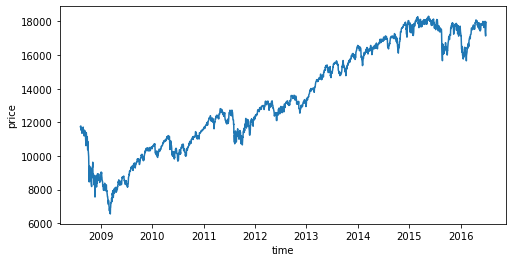

In [ ]:
# 날짜데이터는 Datetime 타입으로 변경
df['date'] = df['date'].astype('str')
df['date'] = pd.to_datetime(df['date'])

# 주가데이터를 시각화
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.lineplot(y=df['close'], x=df['date'])
plt.xlabel('time')
plt.ylabel('price')
plt.show()

* **4-2. 데이터를 머신러닝 연산에 맞게 전처리 합니다.**

저는 주가변화량을 예측하는 것이 목표이기 때문에, 주가변화량을 계산하고 불필요한 특성들은 제거하였습니다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['open','close','low','high']
df[scale_cols] = scaler.fit_transform(df[scale_cols])

df.loc[0:2]

,date,open,high,low,close,volume,top1,top2,top3,top4,...,top16,top17,top18,top19,top20,top21,top22,top23,top24,top25
0,2008-08-08,0.415114,0.433814,0.416695,0.440894,212830000,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,0.440401,0.443018,0.441053,0.444977,183190000,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0.444822,0.435737,0.434783,0.433087,173590000,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


In [ ]:
# 주가변화량을 계산하여 특성을 추가합니다.
df['price'] = df['open']-df['close']

# 변화량을 제외한 불필요한 주가데이터를 제거합니다.
df = df.drop(['open','high','low','close','volume'],axis=1)

# 결측치를 확인해봅니다.
df.isnull().sum()

date     0
top1     0
top2     0
top3     0
top4     0
top5     0
top6     0
top7     0
top8     0
top9     0
top10    0
top11    0
top12    0
top13    0
top14    0
top15    0
top16    0
top17    0
top18    0
top19    0
top20    0
top21    0
top22    0
top23    1
top24    3
top25    3
price    0
dtype: int64

In [ ]:
# top23-25는 후순위 뉴스데이터이므로 불필요하다고 판단하여 제거합시다.
df = df.drop(['top23','top24','top25'], axis=1)
df.isnull().sum()

date     0
top1     0
top2     0
top3     0
top4     0
top5     0
top6     0
top7     0
top8     0
top9     0
top10    0
top11    0
top12    0
top13    0
top14    0
top15    0
top16    0
top17    0
top18    0
top19    0
top20    0
top21    0
top22    0
price    0
dtype: int64

 1~22개로 쪼개진 헤드라인 뉴스를 날짜에 맞춰 하나로 모읍니다.
 
 불필요해진 나머지 뉴스데이터는 제거해줍니다.

In [ ]:
df['news_1'] = df['top1']+df['top2']+df['top3']+df['top4']+df['top5']+df['top6']+df['top7']+df['top8']
df['news_2'] = df['top9']+df['top10']+df['top11']+df['top12']+df['top13']+df['top14']+df['top15']+df['top16']
df['news_3'] = df['top17']+df['top18']+df['top19']+df['top20']+df['top21']+df['top22']

df['news'] = df['news_1']+df['news_2']+df['news_3'] 

In [ ]:
df = df[['date','price','news']]
df

,date,price,news
0,2008-08-08,-0.025780,"b""Georgia 'downs two Russian warplanes' as cou..."
1,2008-08-11,-0.004576,b'Why wont America and Nato help us? If they w...
2,2008-08-12,0.011735,b'Remember that adorable 9-year-old who sang a...
3,2008-08-13,0.008391,b' U.S. refuses Israel weapons to attack Iran:...
4,2008-08-14,-0.007222,b'All the experts admit that we should legalis...
...,...,...,...
1983,2016-06-27,0.018063,Barclays and RBS shares suspended from trading...
1984,2016-06-28,-0.018837,"2,500 Scientists To Australia: If You Want To ..."
1985,2016-06-29,-0.020495,Explosion At Airport In IstanbulYemeni former ...
1986,2016-06-30,-0.018679,Jamaica proposes marijuana dispensers for tour...


* **4-3. 뉴스데이터를 숫자데이터(벡터화)로 변경합니다.**

이렇게 사람의 언어로 표현된 문자들은 머신러닝이 연산할 수 없습니다.

따라서 문자를 행렬조합으로 변경해줄 필요가 있습니다.

먼저 지금까지 전처리된 뉴스데이터가 어떤 형태를 보이는지 알아봅시다.

In [ ]:
df['news'][0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war"b\'BREAKING: Musharraf to be impeached.\'b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\'b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\'b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing"b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\'b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side"b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it."b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\'b\'Did the U.S. Prep Georgia for War with Russia?\'b\'Rice G

대문자, 축약어, 특수기호 등이 많이 보입니다. 

이렇게 불필요해보이는 문자들을 먼저 제거한 후 모든 단어를 소문자로 변경하겠습니다.

In [ ]:
import re

for idx, text in enumerate(df['news']):
    text = text.lower()
    text = text.replace('\n',' ')
    text = re.sub(r'[^a-z0-9 ]', '', text)
    df['news'][idx] = text

<ipython-input-9-27a20773a271>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['news'][idx] = text


다시 결측치를 확인합니다.

In [ ]:
print(df.shape)
print(df.isnull().sum())

(1988, 3)
date     0
price    0
news     0
dtype: int64


데이터를 훈련셋과 테스트셋으로 분리합니다.

In [ ]:
train = df[df['date'] < '2014-07-01']
test = df[df['date'] > '2014-06-30']

train.shape, test.shape

((1482, 3), (506, 3))

특성값과 타겟값을 지정해줍니다.

In [ ]:
x_train = train['news']
y_train = train['price']

x_test = test['news']
y_test = test['price']

print(f'Train : x_train= {x_train.shape}, y_train= {y_train.shape}')
print(f'Test : x_test= {x_test.shape}, y_test= {y_test.shape}')

Train : x_train= (1482,), y_train= (1482,)
Test : x_test= (506,), y_test= (506,)


**각 문장을 단어별로 추려내 단어의 빈도수를 카운트하여 일종의 단어장을 만들겁니다.**

**이 과정을 '토큰화(tokenize)'라고 합니다.**

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=30000)
tokenizer.fit_on_texts(x_train)

vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

58884


이제 문자열을 각 단어의 인덱스로 변경하겠습니다.

이렇게 된다면 컴퓨터가 해당 숫자가 어떤 단어를 의미하는지 인식 할 수 있습니다.

**이 과정을 스퀸스라고 합니다.**

In [ ]:
x_train_encoded = tokenizer.texts_to_sequences(x_train)
x_test_encoded = tokenizer.texts_to_sequences(x_test)

train_max_len = max(len(i) for i in x_train_encoded)
train_mean_len = np.mean([len(i) for i in x_train_encoded])
print(f'Train : Max_Sequence = {train_max_len}, Mean_Sequence = {train_mean_len:.4f}')

test_max_len = max(len(i) for i in x_test_encoded)
test_mean_len = np.mean([len(i) for i in x_test_encoded])
print(f'Test : Max_Sequence = {test_max_len}, Mean_Sequence = {test_mean_len:.4f}')

Train : Max_Sequence = 657, Mean_Sequence = 351.1586
Test : Max_Sequence = 477, Mean_Sequence = 331.7628


가장 긴 헤드라인 뉴스는 인덱스를 660개 가량 가지고 있습니다.

평균적으로는 각 헤드라인 뉴스는 350개 정도의 인덱스를 포함합니다.

보시다시피 각 일자별 헤드라인은 갖고 있는 인덱스의 크기가 다릅니다.

딥러닝에 해당 데이터를 넣기 위해서는 모두 같은 길이로 통일시켜줄 필요가 있습니다.

**이것을 바로 패딩(Padding)이라고 합니다.**



In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

x_train_ps = pad_sequences(x_train_encoded, maxlen= 400)
x_test_ps = pad_sequences(x_test_encoded, maxlen= 400)

x_train_ps.shape, x_test_ps.shape

((1482, 400), (506, 400))

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

위에서 각 날짜별 헤드라인뉴스의 평균 인덱스 갯수가 360개 정도였으므로, 평균보다 조금 많은 400개로 길이를 제한하였습니다.



**이제 컴퓨터가 각 단어가 어떤 숫자로 번역되는지 참고 할 수 있는 외국어사전을 필요로합니다.**

이런 사전을 단어임베딩이라고 하며, 보통 미리 학습된 단어들의 벡터값을 온라인으로 어렵지 않게 구할 수 있습니다.

In [ ]:
# 임베딩벡터 중 성능이 가장 좋다는 GLOVE의 840B.300d 모듈을 사용합니다.

embedding_dict = dict()

f = open('E:/cstates/glove.840B.300d.txt', encoding="utf8")

for line in f:
    word_vector = line.split(' ')
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
    
print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))        

2196017개의 Embedding vector가 있습니다.


In [ ]:
# 임베딩 가중치 행렬을 만들어줍니다.

embedding_matrix = np.zeros((vocab_size, 300))

print(np.shape(embedding_matrix))

(58884, 300)


그리고 토큰화된 단어 인덱스를 임베딩벡터와 대조합니다.

이제 컴퓨터는 특정 행렬값이 어떤 단어를 의미하는지 이해할 수 있습니다.

In [ ]:
def get_vector(word):
    if word in f: 
        return f[word]
    else:
        return None
    
for word, i in tokenizer.word_index.items(): 
    temp = get_vector(word)                  
    if temp is not None:                      
        embedding_matrix[i] = temp   

## 5. 딥러닝 방식을 적용하기 앞서 간단한 회귀모델로 분석

* **5-1. 선형회귀 모델**

In [ ]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
lin_model = lin.fit(x_train_ps, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

lin_pred = lin_model.predict(x_test_ps)

print(f'선형회귀 오차는 "MAE = {mae(lin_pred, y_test):.4f}" / "MSE = {mse(lin_pred, y_test):.4f}"')

선형회귀 오차는 "MAE = 0.0106" / "MSE = 0.0002"


분석모델의 예상치가 실제 예상치보다 평균적으로 매우 크다는 것을 알 수 있습니다.

시각화를 통해 실제값과 예측값을 비교해보겠습니다.

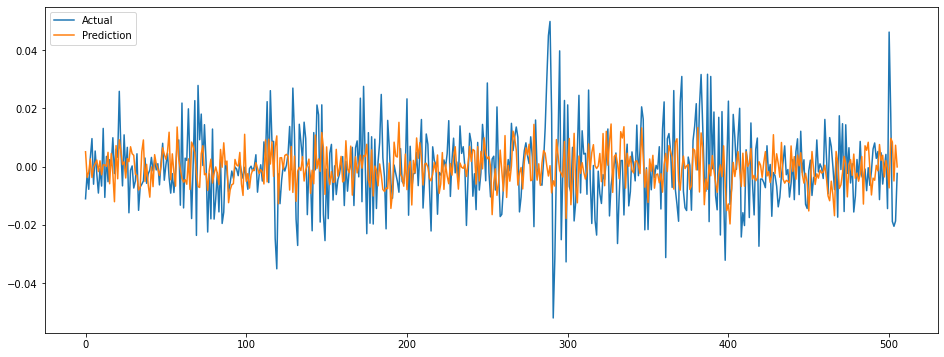

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(np.array(y_test), label = 'Actual')
plt.plot(lin_pred, label = 'Prediction')
plt.legend()
plt.show()

**시각화 자료를 보면 실제 주가변동량과 유사하지만 전체적으로 오차가 크다는 것을 알 수 있습니다.**

## 6. 딥러닝 적용

* 앞선 선형회귀분석의 결과로 딥러닝 분석에서 요구되는 Chance Level은 MAE = 124.8629 입니다.

* 이번에는 시계열분석에 적합한 딥러닝 모델인 LSTM을 사용해보겠습니다.

In [ ]:
# 딥러닝에 필요한 라이브러리를 불러옵니다.
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution1D
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping,Callback
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import initializers

In [ ]:
# 모델에 들어갈 파라미터 값을 정의합니다.

filter_length= 5
dropout=0.2
learning_rate=0.001
nb_filter=16
rnn_output_size = 128
hidden_dims = 128

In [ ]:
# 벡터화된 뉴스데이터로 LSTM을 사용하여 주가를 분석합니다.

model=Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=400))
model.add(Dropout(dropout))

model.add(LSTM(128, activation= 'tanh', dropout=dropout))

model.add(Dense(128, kernel_initializer = weights))
model.add(Dropout(dropout))

model.add(Dense(1,kernel_initializer= weights, name='output'))

model.compile(loss='mean_squared_error',optimizer=Adam(lr= learning_rate, clipvalue=1.0))

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_20 (Embedding)     (None, 400, 300)          17665200  
_________________________________________________________________
dropout_49 (Dropout)         (None, 400, 300)          0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 128)               219648    
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_50 (Dropout)         (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 17,901,489
Trainable params: 17,901,489
Non-trainable params: 0
_________________________________________

In [ ]:
# Callback 함수를 정의합니다.

save_best_weights = 'best_weights.h5'

callbacks = [ModelCheckpoint(save_best_weights, monitor='val_loss', save_best_only=True),
            EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto'),
            ReduceLROnPlateau(monitor='val_loss', factor=0.2, verbose=1, patience=3)]

In [ ]:
model.fit([x_train_ps], y_train, batch_size=128, 
          epochs=100, verbose=True, shuffle=True, callbacks = callbacks, validation_split=0.15)

Epoch 1/100
10/10 [==============================] - 48s 5s/step - loss: 2.2544e-04 - val_loss: 8.4676e-05
Epoch 2/100
10/10 [==============================] - 46s 5s/step - loss: 1.3310e-04 - val_loss: 8.4723e-05
Epoch 3/100
10/10 [==============================] - 46s 5s/step - loss: 7.3334e-05 - val_loss: 9.8449e-05
Epoch 4/100
10/10 [==============================] - ETA: 0s - loss: 4.1108e-05
Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
10/10 [==============================] - 45s 5s/step - loss: 4.1108e-05 - val_loss: 1.0219e-04
Epoch 5/100
10/10 [==============================] - 46s 5s/step - loss: 2.3931e-05 - val_loss: 1.0473e-04
Epoch 6/100
10/10 [==============================] - 47s 5s/step - loss: 1.9533e-05 - val_loss: 1.0323e-04
Epoch 00006: early stopping


In [ ]:
y_pred = model.predict([x_test_ps], verbose=True)

print(f'LSTM 오차는 "MAE = {mae(y_pred, y_test):.4f}" / "MSE = {mse(y_pred, y_test):.4f}"')

16/16 [==============================] - 5s 283ms/step
LSTM 오차는 "MAE = 0.0109" / "MSE = 0.0002"


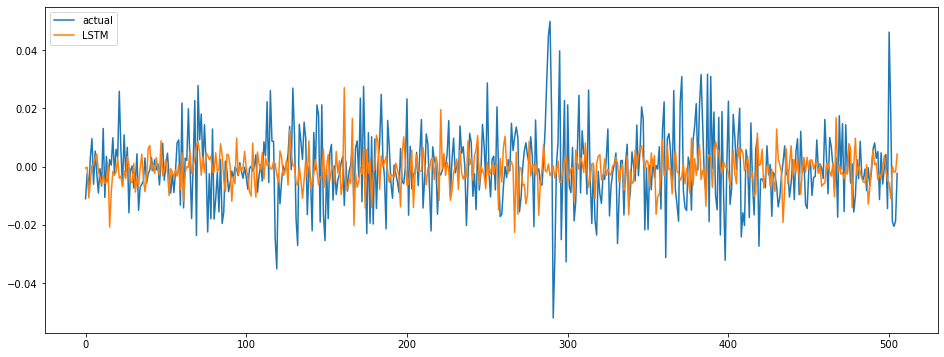

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(y_test, label = 'actual')
plt.plot(y_pred, label = 'LSTM')
plt.legend()
plt.show()


**최종적으로 딥러닝이 머신러닝보다 우위라고 할 수 없는 결과가 나왔습니다.**

**다양한 파라미터로 테스트하였지만 MAE값 0.01에서 더 감소 시키는 것은 어려웠으며**

**두 모델은 거의 차이가 없는 성능을 보인다고 판단됩니다.**

## 7. 딥러닝이 우위를 보이지 못한 분석 

* **7-1. 먼저 관찰을 통해 확인 할 수 있는 사실을 파악해보겠습니다.**


    * a.두 모델의 평균오차는 거의 동등하다고 보여집니다.
    * b.두 모델의 시각화자료 역시 서로 매우 비슷한 패턴을 보입니다.
    * c.오차가 큰 부분 역시 두 모델이 같은 부분으로 확인됩니다.

* **7-2. 이상오차구간 관측**

본 모델은 시계열데이터이므로 해당 시기에 무슨일이 있었는지 확인해봐야할 것 같습니다.

![300](https://github.com/laprass/drive/blob/main/section4_project/image/index_300.png?raw=true)

In [ ]:
val = test.copy().reset_index()
val['date'][300]
print('첫번째 큰 오차가 발생한 데이터는 2015년 9월 전후 입니다.')

첫번째 큰 오차가 발생한 데이터는 2015년 9월 전후 입니다.


![500](https://github.com/laprass/drive/blob/main/section4_project/image/index_500.png?raw=true)

In [ ]:
val['date'][490]
print('두번째 큰 오차가 발생한 데이터는 2016년 6월 전후 입니다.')

두번째 큰 오차가 발생한 데이터는 2016년 6월 전후 입니다.


* **7-3. 당시 발생한 글로벌이슈들**

<br>
<br>

**첫번째 큰 오차가 발생하게된 시기에 큰 경제이슈로 중국발 금융위기 가능성이었습니다.**

![china](https://github.com/laprass/drive/blob/main/section4_project/image/chinashock.PNG?raw=true)

<br>
<br>

**두번째 큰 오차가 발생하게된 시기는 국민투표로 영국이 유로탈퇴를 결정하는 사건이 있었습니다.**

![brexit](https://github.com/laprass/drive/blob/main/section4_project/image/brexit.PNG?raw=true)


## 8. 분석 정리


* **8-1. 초기 가설은 정확했는가?**

저의 초기 가설은 **"언론기사의 특정 키워드들이 주가변동과 높은 상관관계가 있을 것이다."** 였습니다.   

그래도 머신러닝과 딥러닝에서 두 모델의 오차값이 상당히 작은 수준이라 이 가설은 절반 이상 증명되었다고 생각합니다.

* **8-2. 누락된 가설은 없는가?**

그럼에도 딥러닝과 머신러닝이 일정 부분 이상 좋은 성능을 보이지 못한건 한가지 오류가 있었기 때문입니다.

**언론의 키워드에만 의존한 자연어처리 모델이 주가의 방향은 근접하게 예측할 수 있어도,**
**변동폭까지는 정확하게 예측이 힘들다는 것 입니다.**

저는 이 부분을 고려하지 못하고 연구를 진행한 것이 실수였다고 판단합니다.

* **8-3. 학습오류의 원인**

위 두 사건으로 인해 다우존스지수가 큰 폭으로 변동했을때,

자연어처리 모델의 학습자료는 이전에 언론에서 다루지 않았던 패턴들이었을 것 입니다.

따라서 **새로운 키워드가 학습패턴과 다를지라도, 과거와 유사한 수치를 결과값을 보여줄 수 밖에** 없습니다.

* **8-4. 개선 방향**

향후 이 모델을 더 발전시키기 위해서는 포털뉴스의 헤드라인만을 다루는 것에서 벗어나야겠습니다.

대륙별로 스크래핑하여 해당 대륙의 대표지수와 매칭하거나

해당 국가의 GDP, 실업율 같은 경제데이터와 병합시켜 다각적인 모델링을 한다면

딥러닝으로 머신러닝보다 발전된 성과를 거두고, 프로젝트에서 체험한 학습오류를 어느정도 해소할 수 있을 거라 생각합니다.